In [1]:
import os, glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
top_dir='/Users/linniahawkins/Documents/snow_usme2/raw_data/'

i=0
for in_dir in sorted(glob.iglob(f'{top_dir}'+'/2022*/')):
    i = i+1
    in_file = glob.glob(in_dir+'ES_SF*.csv')
    tmp = pd.read_csv(in_file[0],header=0,index_col=0, parse_dates=True, squeeze=True)
    if i == 1:
        SF=tmp 
    else:
        SF = pd.concat([SF,tmp],ignore_index=False)

SF = SF[~SF.index.duplicated(keep='first')]


In [3]:
top_dir='/Users/linniahawkins/Documents/snow_usme2/raw_data/'

i=0
for in_dir in sorted(glob.iglob(f'{top_dir}'+'/2022*/')):
    i = i+1
    in_file = glob.glob(in_dir+'ES_WC*.csv')
    tmp = pd.read_csv(in_file[0],header=0,index_col=0, parse_dates=True, squeeze=True)
    if i == 1:
        WC=tmp 
    else:
        WC = pd.concat([WC,tmp],ignore_index=False)
        
WC = WC[~WC.index.duplicated(keep='first')]

In [4]:
ES1 = pd.DataFrame({'10cm':SF['ES2_SF(1)'],'20cm':SF['ES2_SF(2)'],'30cm':SF['ES2_SF(3)'],'50cm':SF['ES2_SF(4)'],'100cm':SF['ES2_SF(5)']},index=SF.index)
ES2 = pd.DataFrame({'10cm':SF['ES3_SF(1)'],'20cm':SF['ES3_SF(2)'],'30cm':SF['ES3_SF(3)'],'50cm':SF['ES3_SF(4)'],'100cm':SF['ES3_SF(5)']},index=SF.index)
ES3 = pd.DataFrame({'10cm':WC['ES1_WC(1)'],'20cm':WC['ES1_WC(2)'],'30cm':WC['ES1_WC(3)'],'50cm':WC['ES1_WC(4)'],'100cm':WC['ES1_WC(5)']},index=SF.index)


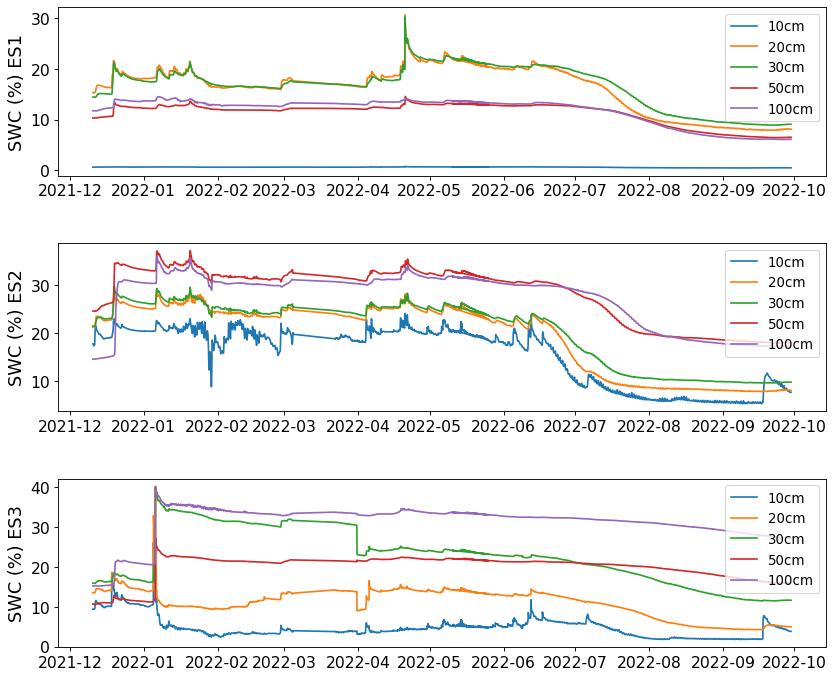

In [5]:
stdate = datetime(2022,1,25); endate = datetime(2022,8,21)

plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.1, bottom=.1, right=.9, top=.9, wspace=0.4, hspace=0.4)
plt.rcParams.update({'font.size': 14})

ax1 = plt.subplot(3,1,1)
ax1.plot(ES1['10cm'],label='10cm')
ax1.plot(ES1['20cm'],label='20cm')
ax1.plot(ES1['30cm'],label='30cm')
ax1.plot(ES1['50cm'],label='50cm')
ax1.plot(ES1['100cm'],label='100cm')
ax1.set_ylabel('SWC (%) ES1',fontsize=16,color='k')
#plt.ylim([0,50])
plt.legend(fontsize=12)

ax1 = plt.subplot(3,1,2)
ax1.plot(ES2['10cm'],label='10cm')
ax1.plot(ES2['20cm'],label='20cm')
ax1.plot(ES2['30cm'],label='30cm')
ax1.plot(ES2['50cm'],label='50cm')
ax1.plot(ES2['100cm'],label='100cm')
ax1.set_ylabel('SWC (%) ES2',fontsize=16,color='k')
#plt.ylim([0,50])
plt.legend(fontsize=12)

ax1 = plt.subplot(3,1,3)
ax1.plot(ES3['10cm'],label='10cm')
ax1.plot(ES3['20cm'],label='20cm')
ax1.plot(ES3['30cm'],label='30cm')
ax1.plot(ES3['50cm'],label='50cm')
ax1.plot(ES3['100cm'],label='100cm')

ax1.set_ylabel('SWC (%) ES3',fontsize=16,color='k')
#plt.ylim([0,50])
plt.legend(fontsize=12)
plt.savefig('2022_snowpillow_senteks.png')